In [ ]:
#Fine Tuning

In [ ]:
!nvidia-smi

Wed Aug  2 08:00:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |    449MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#importing a helper function script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-02 08:00:45--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-02 08:00:45 (126 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip #download training data

--2023-08-02 08:00:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   130MB/s    in 1.2s    

2023-08-02 08:00:48 (130 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
#using helper function to walk through directories
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:
#directory paths creation
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                          image_size=IMG_SIZE,
                                                                          label_mode="categorical",
                                                                          batch_size=BATCH_SIZE,
                                                                          shuffle=True)
test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                             image_size=IMG_SIZE,
                                                             label_mode="categorical",
                                                             batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
#seeing a smaple batch
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[ 84.67857     36.464287     9.948978  ]
   [206.1531     182.05617    172.23984   ]
   [253.89796    253.83163    254.84694   ]
   ...
   [ 89.70412     60.13265      6.989702  ]
   [ 94.122574    63.09706      6.046031  ]
   [119.87275     87.15846     26.158464  ]]

  [[ 87.58164     58.770424    50.92859   ]
   [254.65306    244.30103    243.79082   ]
   [250.2551     249.71428    254.2704    ]
   ...
   [ 88.086716    61.270367     7.142727  ]
   [ 94.43381     65.29095      7.362378  ]
   [124.97491     94.83205     32.90348   ]]

  [[217.41328    214.93369    216.93369   ]
   [252.69897    251.7449     250.53062   ]
   [254.0051     254.38776    251.53061   ]
   ...
   [ 89.12246     68.00002      5.596856  ]
   [ 98.87253     74.2858       7.826604  ]
   [123.14842     96.791275    27.14842   ]]

  ...

  [[254.         254.         254.        ]
   [254.         254.         254.        ]
   [254.         254.         254.        ]
   ...
   [252.33672    252.   

In [ ]:
#create model tf.keras.applications
base_model=tf.keras.applications.EfficientNetB0(include_top=False)

#freeze layers in base_model
base_model.trainable=False

#create input
inputs=tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

#EfficinetB0 already normalises data if we use different model then
#x=tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

#pass inputs
x=base_model(inputs)
print(f"Shape after passing inputs through base model:{x.shape}")

#average pool the outputs(aggregation of most important information)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_pooling_layers")(x)
print(f"Shape after average global pooling:{x.shape}")

#create output activation layer
output=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#combine inputs and outputs with the model
model_0=tf.keras.Model(inputs,output)

#compile the model
model_0.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

#fit the model
history_10_percent=model_0.fit(train_data_10_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25*len(test_data)),
                               callbacks=[create_tensorboard_callback("transfer_learning","10_percent_feature_extraction")])


Shape after passing inputs through base model:(None, 7, 7, 1280)
Shape after average global pooling:(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230802-080055
Epoch 1/5
24/24 [==============================] - 23s 349ms/step - loss: 1.8905 - accuracy: 0.4040 - val_loss: 1.3190 - val_accuracy: 0.7105
Epoch 2/5
24/24 [==============================] - 5s 183ms/step - loss: 1.1084 - accuracy: 0.7507 - val_loss: 0.8935 - val_accuracy: 0.7944
Epoch 3/5
24/24 [==============================] - 6s 195ms/step - loss: 0.7832 - accuracy: 0.8280 - val_loss: 0.7167 - val_accuracy: 0.8207
Epoch 4/5
24/24 [==============================] - 9s 349ms/step - loss: 0.6361 - accuracy: 0.8573 - val_loss: 0.6171 - val_accuracy: 0.8520
Epoch 5/5
24/24 [==============================] - 10s 365ms/step - loss: 0.5492 - accuracy: 0.8813 - val_loss: 0.5810 - val_accuracy: 0.8503


In [ ]:
#evalaute on full dataset
model_0.evaluate(test_data)

79/79 [==============================] - 10s 118ms/step - loss: 0.5600 - accuracy: 0.8624


[0.5600179433822632, 0.8623999953269958]

In [ ]:
#checking layers in base_model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_3
1 rescaling_4
2 normalization_2
3 rescaling_5
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activati

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_4 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_4[0][0]']            
 )                              3)                                                   

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_pooling_layers (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


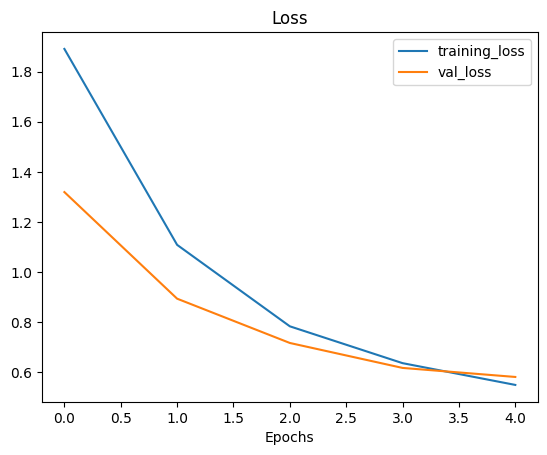

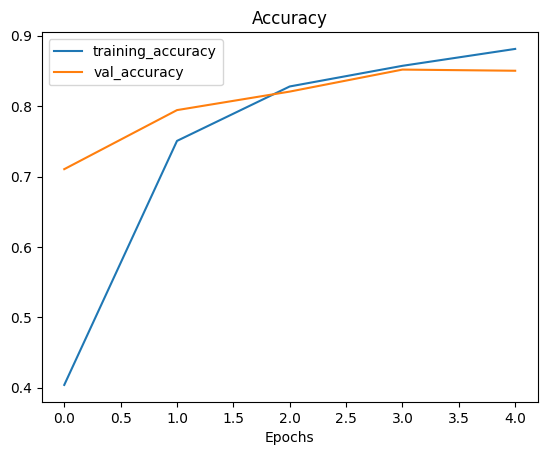

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
#Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-08-02 08:02:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 142.250.99.128, 142.250.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   183MB/s    in 0.7s    

2023-08-02 08:02:11 (183 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent="10_food_classes_1_percent/train/"
test_dir="10_food_classes_1_percent/test/"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'

In [ ]:
IMG_SIZE=(224,224)
train_data_1_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                         label_mode="categorical",
                                                                         image_size=IMG_SIZE,
                                                                         batch_size=BATCH_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode="categorical",
                                                              image_size=IMG_SIZE,
                                                              batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
#data augmentation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
data_augmentation=keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    #preprocessing.Rescale(1./255)EfficinetNet has already rescaling
    ],name="data_augmentation")

(-0.5, 470.5, 384.5, -0.5)

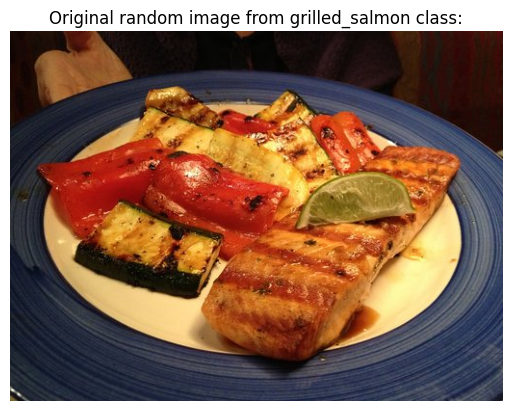

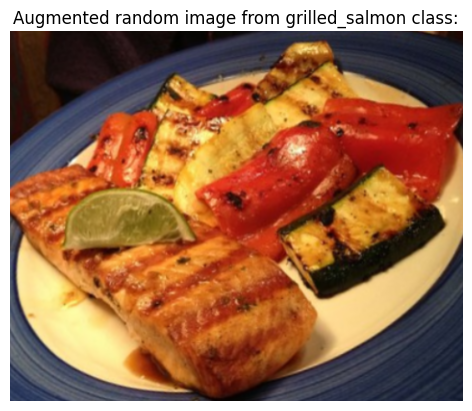

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class=random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/"+target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path=target_dir+"/"+random_image
img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from {target_class} class:")
plt.axis(False)

augmented_img=data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.title(f"Augmented random image from {target_class} class:")
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.axis(False)

In [ ]:
#Model 1:Feature extraction transfer leanring on 1% of the data with data augmentation
input_shape=(224,224,3)
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=layers.Input(shape=input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D()(x)
outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

model_1=keras.Model(inputs,outputs)

model_1.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

history_1_percent=model_1.fit(train_data_1_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_1_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25*len(test_data)),
                              callbacks=[create_tensorboard_callback("transfer_learning","1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230802-080216
Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.3798 - accuracy: 0.1143 - val_loss: 2.2620 - val_accuracy: 0.1793
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1628 - accuracy: 0.2714 - val_loss: 2.1286 - val_accuracy: 0.2615
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9158 - accuracy: 0.5286 - val_loss: 2.0148 - val_accuracy: 0.3421
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.7894 - accuracy: 0.5857 - val_loss: 1.9173 - val_accuracy: 0.4145
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6309 - accuracy: 0.7000 - val_loss: 1.8287 - val_accuracy: 0.4688


In [ ]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
#evaluate on full test dataset
result_1_percent_data_aug=model_1.evaluate(test_data)
result_1_percent_data_aug

79/79 [==============================] - 6s 69ms/step - loss: 1.8345 - accuracy: 0.4616


[1.8345283269882202, 0.46160000562667847]

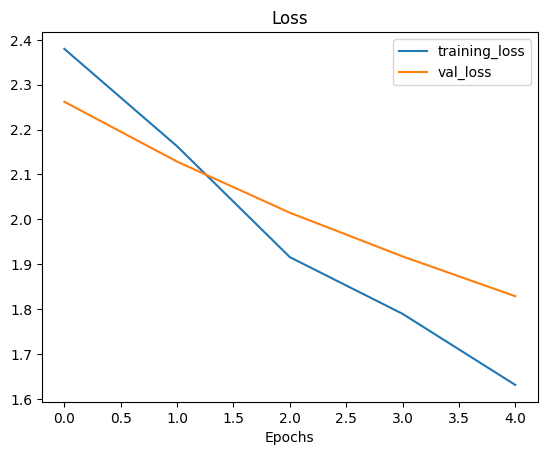

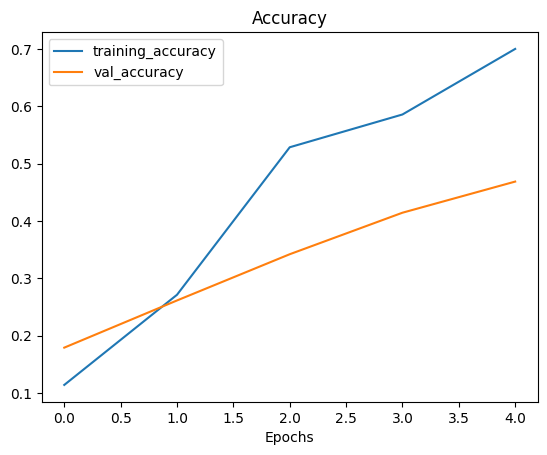

In [ ]:
#plot loss curves
plot_loss_curves(history_1_percent)

In [ ]:
#Model 2:Feature extraction model on 10 percent trianing data with data augmentation
train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode="categorical",
                                                              image_size=IMG_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

In [ ]:
data_augmentation=Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomRotation(0.2)
],name="data_augmentation")

In [ ]:
input_shape=(224,224,3)

#frozen base model is alos called a backbone model
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False
inputs=layers.Input(input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=layers.GlobalAveragePooling2D(name="global_average_polling_2D")(x)
outputs=layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2=tf.keras.Model(inputs,outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_polling_2D (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
#create a ModelCheckPoint callback

#set checkpoint path(place where are checkpoints are saved)
checkpoint_path="10_percent_model_checkpoints_weights/checkpoint.ckpt"

#create a model checkpoint callback that saves model weights only
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=True,
                                                       save_freq="epoch",
                                                       verbose=1)

In [ ]:
initial_epochs=5
history_10_percent_data_aug=model_2.fit(train_data_10_percent,
                                        epochs=initial_epochs,
                                        validation_data=test_data,
                                        validation_steps=int(0.25*len(test_data)),
                                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning"
                                        ,experiment_name="10_percent_data_aug"),checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230802-080300
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0438 - accuracy: 0.3120
Epoch 1: val_loss improved from inf to 1.47705, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 28s 853ms/step - loss: 2.0438 - accuracy: 0.3120 - val_loss: 1.4770 - val_accuracy: 0.6842
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3349 - accuracy: 0.6827
Epoch 2: val_loss improved from 1.47705 to 0.98525, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 14s 563ms/step - loss: 1.3349 - accuracy: 0.6827 - val_loss: 0.9853 - val_accuracy: 0.8240
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0219 - accuracy: 0.7680
Epoch 3: val_loss improved from 0.98525 to 0.77482, saving model to 10_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [====

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 76ms/step - loss: 0.5600 - accuracy: 0.8624


[0.5600180625915527, 0.8623999953269958]

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 97ms/step - loss: 0.6214 - accuracy: 0.8468


[0.6213536262512207, 0.8468000292778015]

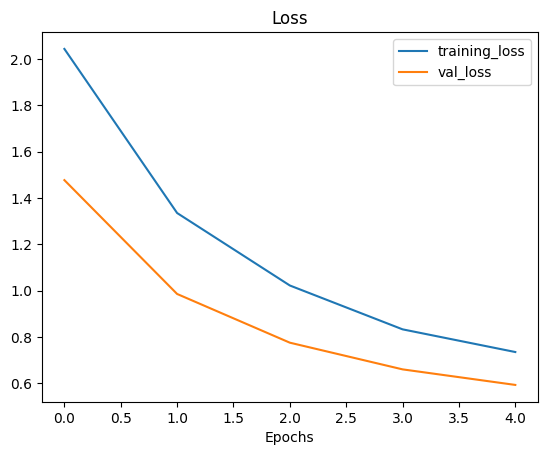

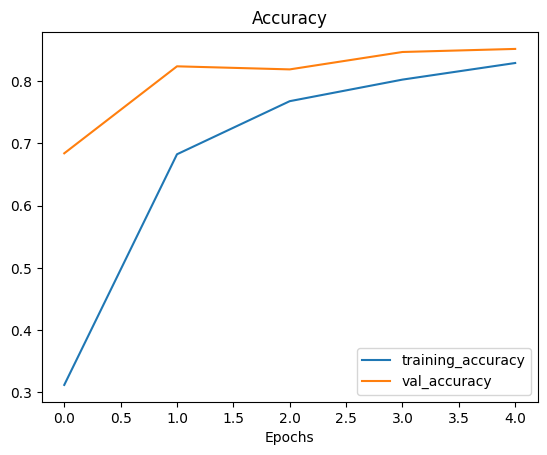

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

In [ ]:
#loading checkpointed weights
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 74ms/step - loss: 0.6214 - accuracy: 0.8468


[0.621353805065155, 0.8468000292778015]

In [ ]:
#Model 3:fine tuning an existing model on 10 percent data
model_2.layers

In [ ]:
for layers in model_2.layers:
  print(layers,layers.trainable)

<keras.engine.input_layer.InputLayer object at 0x79b4a651f3a0> True
<keras.engine.sequential.Sequential object at 0x79b4a651fb20> True
<keras.engine.functional.Functional object at 0x79b4a625a1d0> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x79b4a5fb7cd0> True
<keras.layers.core.dense.Dense object at 0x79b4a60acaf0> True


In [ ]:
for i,layers in enumerate(model_2.layers[2].layers):
  print(i,layers.name,layers.trainable)

0 input_5 False
1 rescaling_8 False
2 normalization_4 False
3 rescaling_9 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
base_model.trainable=True
for layer in base_model.layers[:-10]:
  layer.trainable=False
inputs=tf.keras.layers.Input(input_shape,name="input_layer")
x=data_augmentation(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name="global_average_polling_2D")(x)
outputs=tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2=tf.keras.Model(inputs,outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
for i,layers in enumerate(model_2.layers[2].layers):
  print(i,layers.name,layers.trainable)

0 input_9 False
1 rescaling_16 False
2 normalization_8 False
3 rescaling_17 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
fine_tune_epochs=initial_epochs+5

In [ ]:
history_fine_10_percent_aug=model_2.fit(train_data_10_percent,
                                        epochs=fine_tune_epochs,
                                        validation_data=test_data,
                                        validation_steps=int(0.25*len(test_data)),
                                        initial_epoch=history_10_percent_data_aug.epoch[-1],
                                        callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230802-083636
Epoch 5/10
24/24 [==============================] - 24s 500ms/step - loss: 1.2739 - accuracy: 0.5827 - val_loss: 0.5452 - val_accuracy: 0.7961
Epoch 6/10
24/24 [==============================] - 11s 432ms/step - loss: 0.5334 - accuracy: 0.8187 - val_loss: 0.3990 - val_accuracy: 0.8684
Epoch 7/10
24/24 [==============================] - 13s 527ms/step - loss: 0.3154 - accuracy: 0.8947 - val_loss: 0.3795 - val_accuracy: 0.8684
Epoch 8/10
24/24 [==============================] - 9s 357ms/step - loss: 0.2369 - accuracy: 0.9307 - val_loss: 0.3483 - val_accuracy: 0.8849
Epoch 9/10
24/24 [==============================] - 8s 318ms/step - loss: 0.1930 - accuracy: 0.9493 - val_loss: 0.4275 - val_accuracy: 0.8536
Epoch 10/10
24/24 [==============================] - 9s 336ms/step - loss: 0.1360 - accuracy: 0.9547 - val_loss: 0.3342 - val_accuracy: 0.8882


In [ ]:
results_fine_tune_10_percent=model_2.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 0.3918 - accuracy: 0.8724


In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    acc=original_history.history["accuracy"]
    loss=original_history.history["loss"]
    val_acc=original_history.history["val_accuracy"]
    val_loss=original_history.history["val_loss"]
    total_acc=acc+new_history.history["accuracy"]
    total_loss=loss+new_history.history["loss"]

    total_val_acc=val_acc+new_history.history["val_accuracy"]
    total_val_loss=val_loss+new_history.history["val_loss"]
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc,label='Training Accuracy')
    plt.plot(total_val_acc,label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(),label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],plt.ylim(),label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

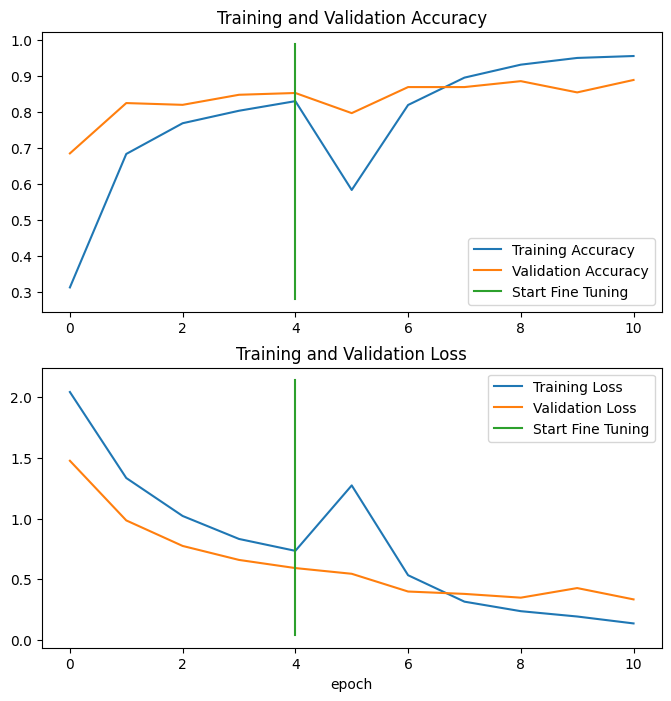

In [ ]:
compare_historys(original_history=history_10_percent_data_aug,
                new_history=history_fine_10_percent_aug,
                initial_epochs=5)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-08-02 08:50:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 172.253.117.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  87.7MB/s    in 7.2s    

2023-08-02 08:50:46 (69.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir_all_data="10_food_classes_all_data/train"
test_dir="10_food_classes_all_data/test"

In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [ ]:
import tensorflow as tf
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_classes=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode="categorical",
                                                              image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ["accuracy"])
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 10s 70ms/step - loss: 0.6214 - accuracy: 0.8468


[0.6213536858558655, 0.8468000292778015]

In [ ]:
for i,layers in enumerate(model_2.layers[2].layers):
  print(i,layers.name,layers.trainable)

0 input_9 False
1 rescaling_16 False
2 normalization_8 False
3 rescaling_17 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fa

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs=initial_epochs+5
history_10_classes_full=model_2.fit(train_data_10_classes,
                                    epochs=fine_tune_epochs,
                                    steps_per_epoch=len(train_data_10_classes),
                                    validation_data=test_data,
                                    validation_steps=int(0.25*len(test_data)),
                                    initial_epoch=history_10_percent_data_aug.epoch[-1],
                                    callbacks=[create_tensorboard_callback("transfer learning","full_10_classes_fine_tune_last_10")]
                                    )

Saving TensorBoard log files to: transfer learning/full_10_classes_fine_tune_last_10/20230802-093637


Epoch 5/10
235/235 [==============================] - 76s 274ms/step - loss: 0.6555 - accuracy: 0.7889 - val_loss: 0.3563 - val_accuracy: 0.8865
Epoch 6/10
235/235 [==============================] - 59s 251ms/step - loss: 0.5198 - accuracy: 0.8312 - val_loss: 0.3379 - val_accuracy: 0.8849
Epoch 7/10
235/235 [==============================] - 54s 226ms/step - loss: 0.4759 - accuracy: 0.8419 - val_loss: 0.3267 - val_accuracy: 0.9079
Epoch 8/10
235/235 [==============================] - 48s 203ms/step - loss: 0.4233 - accuracy: 0.8608 - val_loss: 0.3083 - val_accuracy: 0.9046
Epoch 9/10
235/235 [==============================] - 45s 191ms/step - loss: 0.3860 - accuracy: 0.8743 - val_loss: 0.2917 - val_accuracy: 0.9112
Epoch 10/10
235/235 [==============================] - 51s 218ms/step - loss: 0.3622 - accuracy: 0.8861 - val_loss: 0.2942 - val_accuracy: 0.9112


In [ ]:
results_fine_tune_full_data=model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 74ms/step - loss: 0.2836 - accuracy: 0.9104


[0.28355929255485535, 0.9103999733924866]

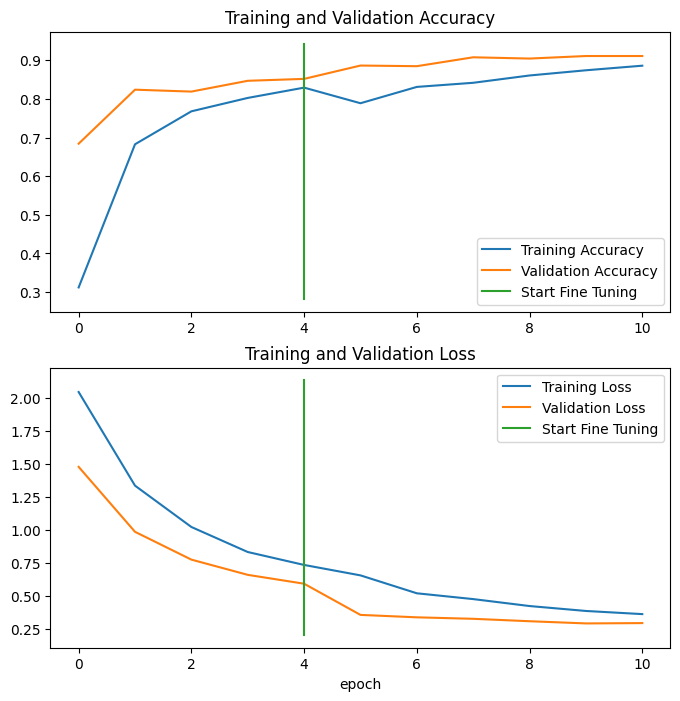

In [ ]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_10_classes_full,
                 initial_epochs=5)

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
--name "Transfer Learning Experiments" \
--description "A series of transfer leanring experiments with various amounts of fine tuning and data"\
--one_shot

2023-08-02 09:48:42.881948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   BWD-XJK-LBP



New experiment created. View your TensorBoard at: https://tensorboard.dev/